## Pattern Completion Results

In [10]:
OUTDATED_IGNORE=1 # for pingouin - should probably update this!
import math
import pandas as pd
import numpy as np
import pingouin as pg
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

In [3]:
figurepath = 'C:/Users/tuq67942/OneDrive - Temple University/Documents/Figures/'
dependencydf = pd.read_csv('csvs/Dependency_Year_1.csv')
pairaccuracydf = pd.read_csv('csvs/PC_pairs.csv')
PCoutputdf = pd.read_csv('csvs/PC_outputdf.csv')
PCconddf = pd.read_csv('csvs/PC_outputconddf.csv')
PCoutputplotdf = pd.read_csv('csvs/PC_outputplotdf.csv')

# Exclude people at ceiling (not people at floor!)

In [4]:
def exclude_fun(df,exlist):
    df = df[~df.Subject.isin(exlist)]
    return df

exclude = 1
if exclude == 1:
    excludedf = dependencydf[dependencydf['Accuracy']>0.95]
    exclude_subjs = excludedf['Subject']
    dependencydf = exclude_fun(dependencydf,exclude_subjs)
    pairaccuracydf = exclude_fun(pairaccuracydf,exclude_subjs)
    PCoutputdf = exclude_fun(PCoutputdf,exclude_subjs)
    PCconddf = exclude_fun(PCconddf,exclude_subjs)
    PCoutputplotdf = exclude_fun(PCoutputplotdf,exclude_subjs)
    

## Does delay matter for accuracy? Yes!
## Does delay matter for dependency? No!

In [48]:
from pingouin import ttest
for res in ['Accuracy','Dependency']:
    print(res+' difference with people with near-perfect accuracy:')  
    display(ttest(dependencydf[dependencydf['Delay']==True][res],
                  dependencydf[dependencydf['Delay']==False][res]))
    print(res+' difference without them:')
    display(ttest(dependencydf.loc[(dependencydf['Delay']==True) 
                                   & (dependencydf['Accuracy']<0.95)][res],
                  dependencydf.loc[(dependencydf['Delay']==False) 
                                   & (dependencydf['Accuracy']<0.95)][res]))

Accuracy difference with people with near-perfect accuracy:


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-8.738253,63.162737,two-sided,1.803081e-12,"[-0.42, -0.27]",2.022948,1.388e+10,1.0


Accuracy difference without them:


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-8.738253,63.162737,two-sided,1.803081e-12,"[-0.42, -0.27]",2.022948,1.388e+10,1.0


Dependency difference with people with near-perfect accuracy:


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-0.572536,71.680689,two-sided,0.56875,"[-0.03, 0.02]",0.127068,0.275,0.084614


Dependency difference without them:


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-0.572536,71.680689,two-sided,0.56875,"[-0.03, 0.02]",0.127068,0.275,0.084614


## Nora question: for immediate group, does performance differ between first and second session?

In [50]:
tmp = dependencydf[dependencydf['Delay'] == False].reset_index(drop=True)
#tmp = tmp[~tmp['Subject'].isin(['MDEM083','MDEM087'])]
for res in ['Accuracy','Dependency']:
    print('Results for: '+res)
    display(ttest(tmp[res+' First'], tmp[res+' Second'], paired=True))
    #print(np.sort(list(tmp[res+' First']- tmp[res+' Second'])))
    for half in ['First','Second']:
        print('Mean '+res+' in '+half+' half:')
        print(np.round(np.mean(tmp[res+' '+half]),2))
        print('+/-')
        print(np.round(np.std(tmp[res+' '+half]),2))

Results for: Accuracy


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,3.162902,30,two-sided,0.003563,"[0.03, 0.13]",0.418779,10.794,0.616635


Mean Accuracy in First half:
0.82
+/-
0.19
Mean Accuracy in Second half:
0.75
+/-
0.17
Results for: Dependency


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-3.484947,30,two-sided,0.001537,"[-0.06, -0.02]",0.78471,22.486,0.988257


Mean Dependency in First half:
0.02
+/-
0.03
Mean Dependency in Second half:
0.06
+/-
0.06


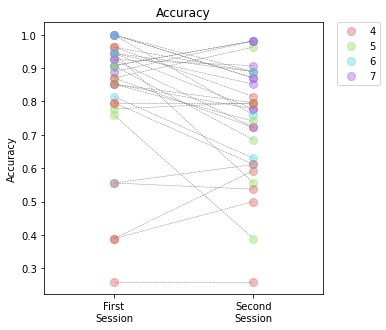

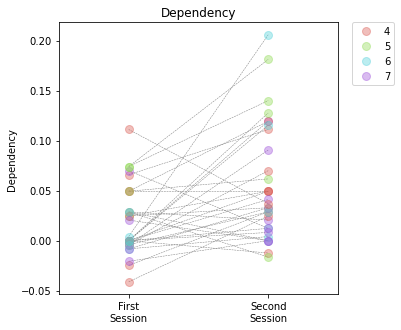

In [55]:
import colorcet as cc
palette = sns.color_palette(cc.glasbey, n_colors=len(tmp))
palette=['#6e90bf',  '#d9a6a4', '#c26f6d']
pal=sns.color_palette("hls", 4).as_hex()

tmp = dependencydf[dependencydf['Delay'] == False].reset_index(drop=True)
tmp = tmp.sort_index(ascending=False).reset_index(drop=True)
new_order = [3,1,2,0]+list(np.arange(4,len(tmp)))
tmp=tmp.reindex(new_order).reset_index(drop=True)

for res in ['Accuracy','Dependency']:
    fig,ax=plt.subplots(figsize=(5,5))
    for i,col in enumerate(['First','Second']):
        #ax.plot(i*np.ones((len(tmp),1)), tmp[res+' '+col], 'o', alpha=.40, zorder=1, ms=8, mew=1)
        for ii in range(len(tmp)):
            ageidx = int(np.floor(tmp['Age'].iloc[ii])-4)
            ax.plot(i, tmp[res+' '+col].iloc[ii], 'o', alpha=.4, zorder=1, ms=8, mew=1, c=pal[ageidx],label=ageidx+4)
            #if tmp['Same Day'].iloc[ii]==True:
            #    ax.plot(i, tmp[res+' '+col].iloc[ii], 'o', alpha=.1, zorder=1, ms=8, mew=1, c=palette[0])
            #else:
            #    ax.plot(i, tmp[res+' '+col].iloc[ii], marker='*', alpha=1, zorder=1, ms=15, mew=1, c=palette[1])
                
    ax.set_xticks(range(2))
    ax.set_xticklabels(['First\nSession','Second\nSession'])
    ax.set_xlim(-0.5,1.5)
    for idx in tmp.index:
        ax.plot([0,1], tmp.loc[idx,[res+' First',res+' Second']], color = 'grey', linewidth = 0.5, linestyle = '--', zorder=-1)
    ax.set_title(res)
    ax.set_ylabel(res)
    ax.legend()
    handles, labels = ax.get_legend_handles_labels()
    l = plt.legend(handles[0:4], labels[0:4], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    #leg = ax.get_legend()
    #hl_dict = {handle.get_label(): handle for handle in leg.legendHandles}
    #for ci,c in enumerate(pal):
    #    hl_dict[str(ci+4)].set_color(c)


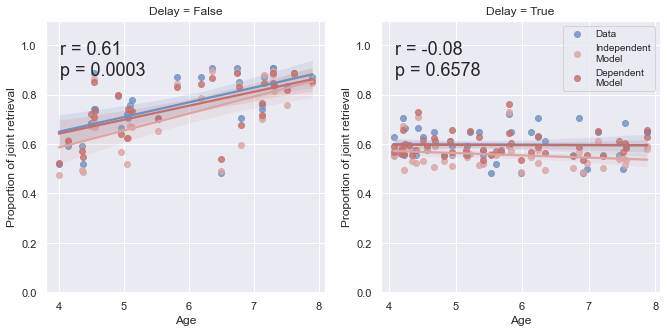

,Delay,Variable,r,p,N
0,False,Data,0.595300,0.000411,31
1,False,Independent\nModel,0.612404,0.000251,31
2,False,Dependent\nModel,0.629509,0.000148,31
3,True,Data,-0.018196,0.902304,48
4,True,Independent\nModel,-0.212070,0.147883,48
5,True,Dependent\nModel,-0.014296,0.923172,48


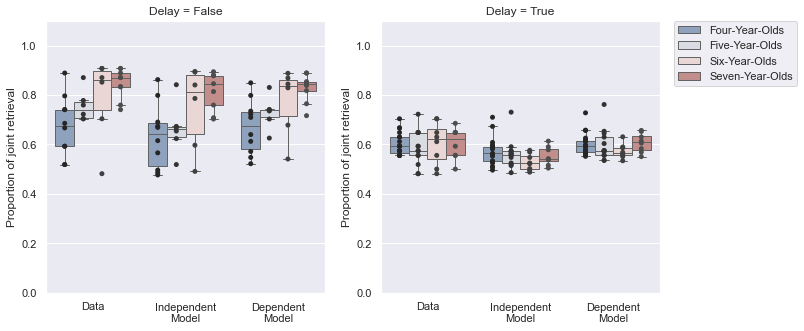

In [55]:
sns.set(font_scale=1)
palette=['#6e90bf',  '#d9a6a4', '#c26f6d']
order = ["Four-Year-Olds","Five-Year-Olds","Six-Year-Olds","Seven-Year-Olds"]
tmp = PCoutputplotdf[PCoutputplotdf['Model-type'].str.contains('Data|Independent Model|Dependent Model')].copy()
tmp['Model-type'] = tmp['Model-type'].replace({'Independent Model': 'Independent\nModel',
                                               'Dependent Model': 'Dependent\nModel'})
def numbers_to_words (number):
    number2word = {'4': "Four-Year-Olds", '5': "Five-Year-Olds", '6': "Six-Year-Olds",
            '7': "Seven-Year-Olds", '8': "Eight-Year-Olds", '9': "Nine-Year-Olds"}
    return " ".join(map(lambda i: number2word[i], str(number)))
statlist = []
r = 'r'
p = 'p'
fig, axes = plt.subplots(1, 2, figsize=(11, 5))
for i,delay in enumerate([False,True]):
    tmp_ = tmp[tmp.Delay == delay]
    for c,model in enumerate(tmp['Model-type'].unique()):
        tmpdf = tmp_[tmp_['Model-type'].str.contains(model)].copy()
        tmpdf = tmpdf.rename(columns={'Dependency': model})
        stat_vals = stats.pearsonr(tmpdf['Age'],tmpdf[model])
        statlist.append({'Delay':delay,'Variable':model, r:stat_vals[0], p:stat_vals[1], 'N':len(tmpdf)})
        g = sns.regplot(data=tmpdf, x="Age", y=model, ax=axes[i], color=palette[c], label=model)
        axes[i].set(ylim=(0, 1.1))
        axes[i].set_title('Delay = '+str(delay))
        axes[i].set_ylabel('Proportion of joint retrieval')
    sl = statlist[i*3:(i*3)+3]
    axes[i].text(0.05, 0.8, f'r = {np.mean([v[r] for v in sl]):.2f}\np = {np.mean([v[p] for v in sl]):.4f}', transform=axes[i].transAxes, size=18)
plt.legend(fontsize=10)
plt.show()
statdf=pd.DataFrame(statlist)
display(statdf)
tmp['Age'] = tmp['Age'].map(lambda age: numbers_to_words(math.floor(age)))
fig, axes = plt.subplots(1, 2, figsize=(11, 5))
for i,delay in enumerate([False,True]):
    tmp_ = tmp[tmp.Delay == delay]
    sns.boxplot(data=tmp_, x="Model-type", y="Dependency", hue="Age", palette="vlag",ax=axes[i],
                hue_order=order, showfliers = False)
    sns.stripplot(data=tmp_, x="Model-type", y="Dependency", hue="Age", dodge=True,palette='dark:.3',
                  hue_order=order, jitter=False,legend=False,ax=axes[i])
    axes[i].set(ylim=(0, 1.1))
    axes[i].set_title('Delay = '+str(delay))
    axes[i].set(xlabel=None)
    axes[i].set_ylabel('Proportion of joint retrieval')
    
i = axes[0].legend().remove()
i = axes[1].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

## Accuracy increases with age
## Dependency is stable across age

,Delay,Variable,r,p,N
0,False,Accuracy,0.613679,0.000241,31
1,True,Accuracy,0.492296,0.000379,48
2,False,Dependency,-0.238958,0.195445,31
3,True,Dependency,0.173863,0.237273,48


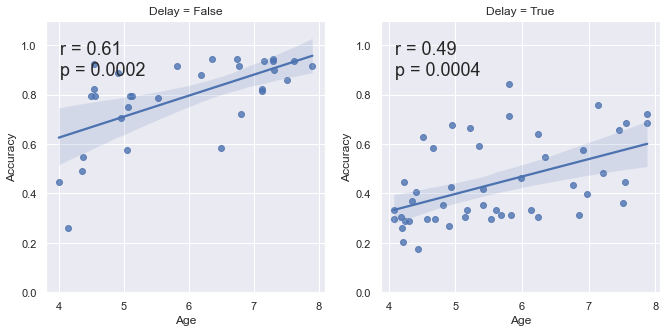

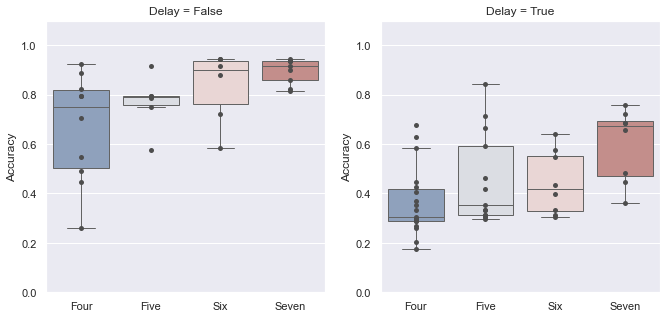

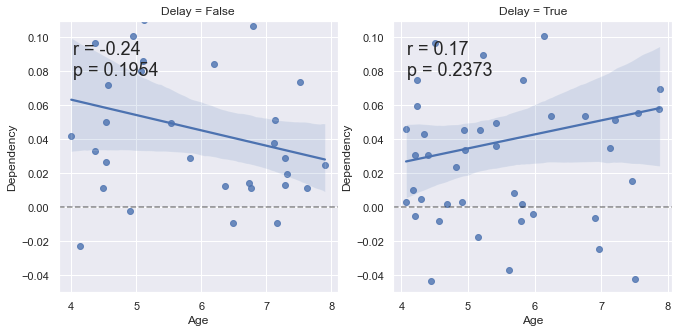

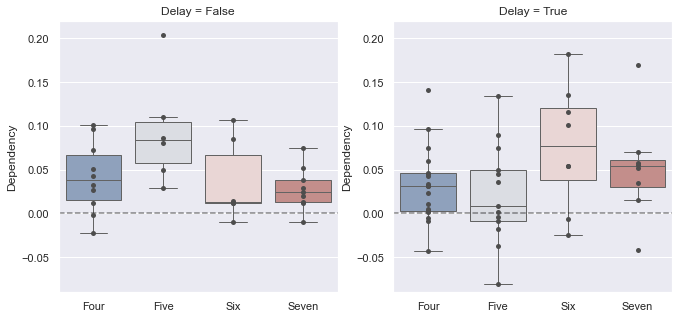

In [56]:
pal = sns.color_palette("vlag",4)
palette = sns.color_palette([pal.as_hex()[0],pal.as_hex()[1],pal.as_hex()[2],pal.as_hex()[3]])
order = ["Four","Five","Six","Seven"]
statlist = []
def numbers_to_words (number):
    number2word = {'4': "Four", '5': "Five", '6': "Six",
            '7': "Seven", '8': "Eight", '9': "Nine"}
    return " ".join(map(lambda i: number2word[i], str(number)))
for res in ['Accuracy','Dependency']:
    tmp = PCoutputplotdf[PCoutputplotdf['Model-type'].str.contains(res)].copy()
    if 'A' in res: tmp = tmp.rename(columns={'Dependency': 'Accuracy'})
    fig, axes = plt.subplots(1, 2, figsize=(11, 5))
    for i,delay in enumerate([False,True]):
        tmp_ = tmp[tmp.Delay == delay]
        stat_vals = stats.pearsonr(tmp_['Age'],tmp_[res])
        statlist.append({'Delay':delay,'Variable':res, 'r':stat_vals[0], 'p':stat_vals[1], 'N':len(tmp_)})
        g = sns.regplot(data=tmp_, x="Age", y=res, ax=axes[i])
        axes[i].text(0.05, 0.8, f'r = {stat_vals[0]:.2f}\np = {stat_vals[1]:.4f}', transform=axes[i].transAxes, size=18)
        axes[i].set(ylim=(0, 1.1)) if 'A' in res else axes[i].set(ylim=(-0.05, 0.11))
        axes[i].set_title('Delay = '+str(delay))
        if 'D' in res: axes[i].axhline(y=0.0, color='k', linestyle='--',alpha=0.5)
    tmp['Age'] = tmp['Age'].map(lambda age: numbers_to_words(math.floor(age)))
    fig, axes = plt.subplots(1, 2, figsize=(11, 5))
    for i,delay in enumerate([False,True]):
        tmp_ = tmp[tmp.Delay == delay]
        sns.boxplot(data=tmp_, x="Age", y=res, hue="Age", ax=axes[i],palette=palette,
                    hue_order=order, order=order, showfliers = False)
        sns.stripplot(data=tmp_, x="Age", y=res, dodge=True,color='.3',
                      order=order, jitter=False,ax=axes[i])
        axes[i].set(ylim=(0, 1.1)) if 'A' in res else axes[i].set(ylim=(-0.09, 0.22))
        axes[i].set_title('Delay = '+str(delay))
        axes[i].set(xlabel=None)
        if 'D' in res: axes[i].axhline(y=0.0, color='k', linestyle='--',alpha=0.5)
statdf=pd.DataFrame(statlist)
display(statdf)

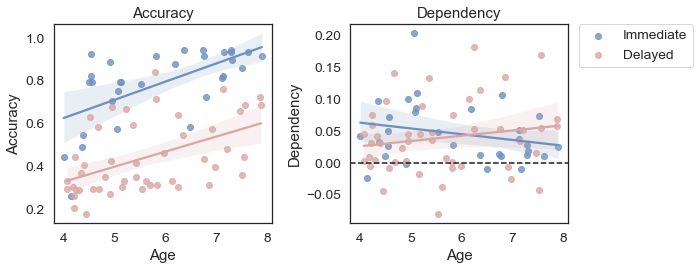

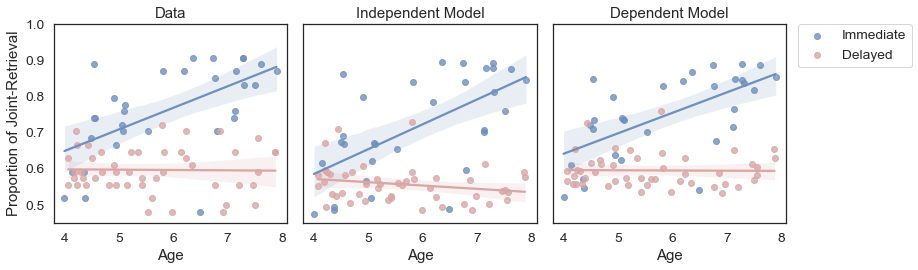

In [78]:
order = ['Accuracy','Dependency','Data','Independent Model','Dependent Model']
sns.set_theme(style="white",font_scale=1.25, palette=['#6e90bf',  '#d9a6a4', '#c26f6d'])
fig,ax=plt.subplots(1,2,figsize=(10, 4))
for i,res in enumerate(['Accuracy','Dependency']):
    tmp = PCoutputplotdf[PCoutputplotdf['Model-type'].str.contains(res)].copy()
    if 'A' in res: tmp = tmp.rename(columns={'Dependency': 'Accuracy'})
    sns.regplot(data=tmp[tmp['Delay']==False],x="Age", y=res,ax=ax[i],label='Immediate')
    sns.regplot(data=tmp[tmp['Delay']==True],x="Age", y=res,ax=ax[i],label='Delayed')
    #ax[i].set_ylim([0,1])
    if i==1:
        ax[i].axhline(y=0, color='k', linestyle='--')
    ax[i].set_title(res)
handles, labels = ax[i].get_legend_handles_labels()
l = plt.legend(handles[0:4], labels[0:4], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.tight_layout()

yname = 'Proportion of Joint-Retrieval'
tmp = PCoutputplotdf.rename({'Dependency':yname},axis=1)
order = ['Data','Independent Model','Dependent Model']
fig,ax=plt.subplots(1,3,figsize=(13, 4))
for i,res in enumerate(['Data','Independent Model','Dependent Model']):
    tmp_ = tmp[tmp['Model-type'].str.contains(res)].copy()
    sns.regplot(data=tmp_[tmp_['Delay']==False],x="Age", y=yname,ax=ax[i],label='Immediate')
    sns.regplot(data=tmp_[tmp_['Delay']==True],x="Age", y=yname,ax=ax[i],label='Delayed')
    ax[i].set_ylim([0.45,1])
    ax[i].set_title(res)
    if i>0:
        ax[i].set(yticklabels=[])
        ax[i].set(ylabel=None)
handles, labels = ax[i].get_legend_handles_labels()
l = plt.legend(handles[0:4], labels[0:4], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.tight_layout()


# Answering Zoe and Nora's question from December 2023:
## Does the relationship between age and accuracy/dependency significantly differ between delay vs. no-delay groups?

## 1) Is there a significant interaction?

In [81]:
import statsmodels.formula.api as sm2

for res in PCoutputplotdf['Model-type'].unique():
    tmp = PCoutputplotdf[PCoutputplotdf['Model-type'].str.contains(res)].copy()
    result = sm2.ols(formula='Dependency ~ Age + Delay + Age * Delay',
                     data=tmp).fit()    
    print(res)
    print('p = ',result.pvalues['Age:Delay[T.True]'])
    print(result.summary()) 


Dependency
p =  0.08932604783147259
                            OLS Regression Results                            
Dep. Variable:             Dependency   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     1.106
Date:                Thu, 11 Jan 2024   Prob (F-statistic):              0.352
Time:                        14:35:44   Log-Likelihood:                 123.04
No. Observations:                  79   AIC:                            -238.1
Df Residuals:                      75   BIC:                            -228.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
In

## 1) Do the correlations significantly differ?

In [42]:
# Code from chat GPT:
from scipy.stats import norm

# Function to transform Pearson r to Fisher Z
def r_to_z(r):
    return np.arctanh(r)

# Function to calculate standard error for Fisher Z
def standard_error(n):
    return 1/np.sqrt(n-3)

# Function to test the difference in correlation coefficients
def test_correlation_difference(r1, n1, r2, n2):
    z1 = r_to_z(r1)
    z2 = r_to_z(r2)
    se1 = standard_error(n1)
    se2 = standard_error(n2)

    # Calculate z-score for the difference
    z_diff = (z1 - z2) / np.sqrt(se1**2 + se2**2)
    p_value = 2 * (1 - norm.cdf(abs(z_diff)))

    return z_diff, p_value

for res in PCoutputplotdf['Model-type'].unique():
    tmp = PCoutputplotdf[PCoutputplotdf['Model-type'].str.contains(res)].copy()
    tmpdf1 = tmp[tmp['Delay'] == False]
    tmpdf2 = tmp[tmp['Delay'] == True]
    res1 = stats.pearsonr(tmpdf1['Age'],tmpdf1['Dependency'])[0]
    res2 = stats.pearsonr(tmpdf2['Age'],tmpdf2['Dependency'])[0]
    z_diff, p_value = test_correlation_difference(res1, len(tmpdf1), res2, len(tmpdf2))
    print('Difference in correlations for: '+res)
    print(f"Z-difference: {round(z_diff,2)}, P-value: {round(p_value,4)}")

Difference in correlations for: Dependency
Z-difference: -1.61, P-value: 0.1077
Difference in correlations for: Data
Z-difference: 2.05, P-value: 0.0407
Difference in correlations for: Independent Model
Z-difference: 2.4, P-value: 0.0163
Difference in correlations for: Dependent Model
Z-difference: 2.27, P-value: 0.0234
Difference in correlations for: Accuracy
Z-difference: 1.34, P-value: 0.1812


## Accuracy broken down by pair-type (6 pairs)
## Run ANOVA/t-tests to see if any pair has better accuracy

For subjects with delay = True


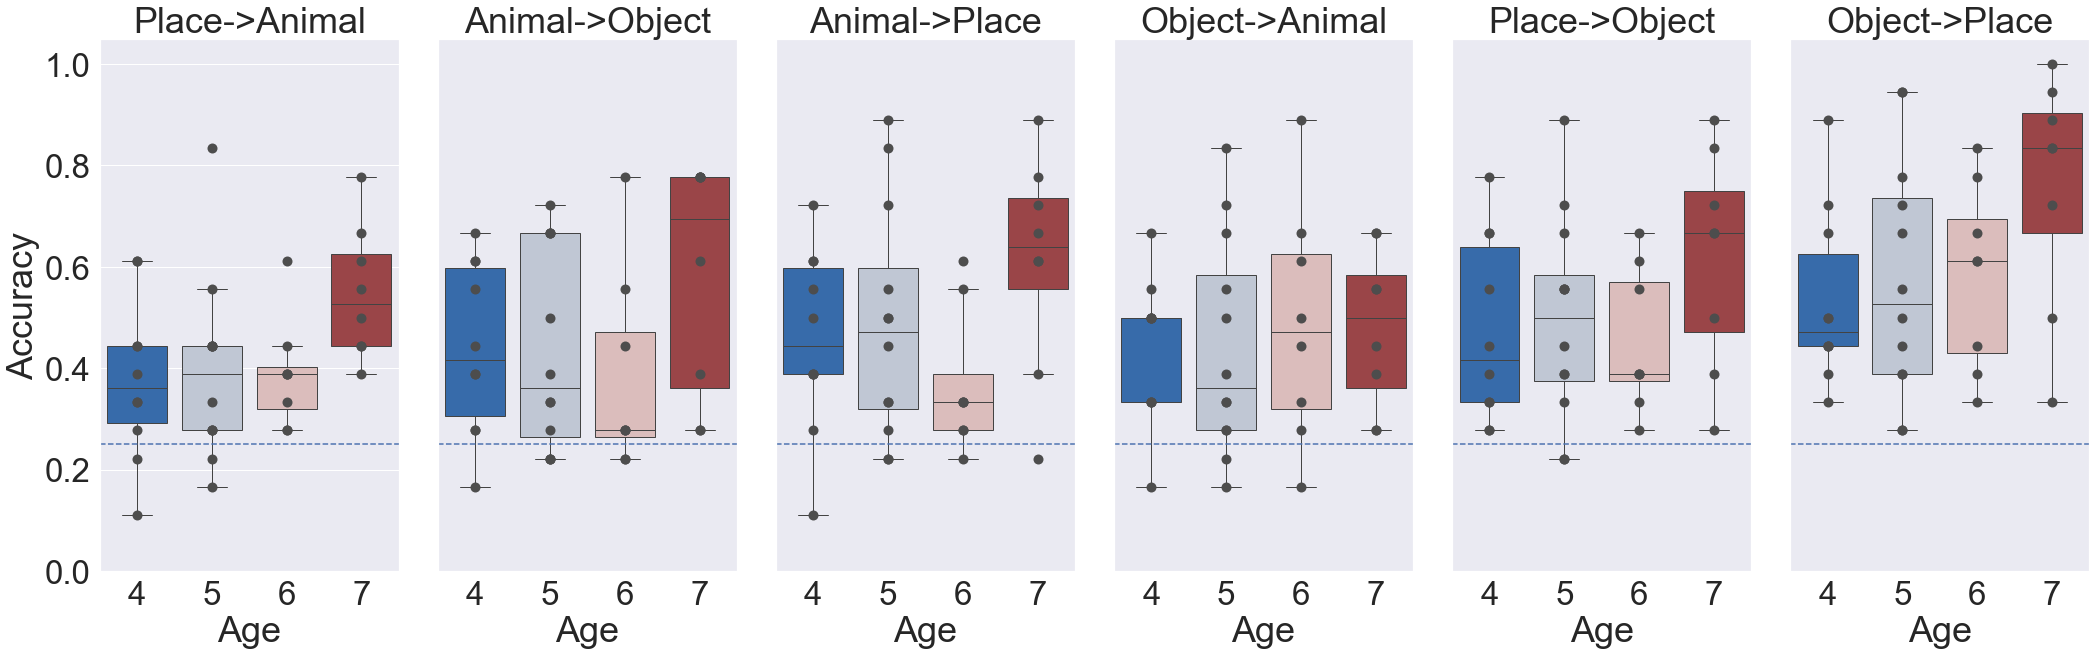

               Anova
     F Value Num DF  Den DF  Pr > F
-----------------------------------
Pair 10.3170 5.0000 185.0000 0.0000

For subjects with delay = False


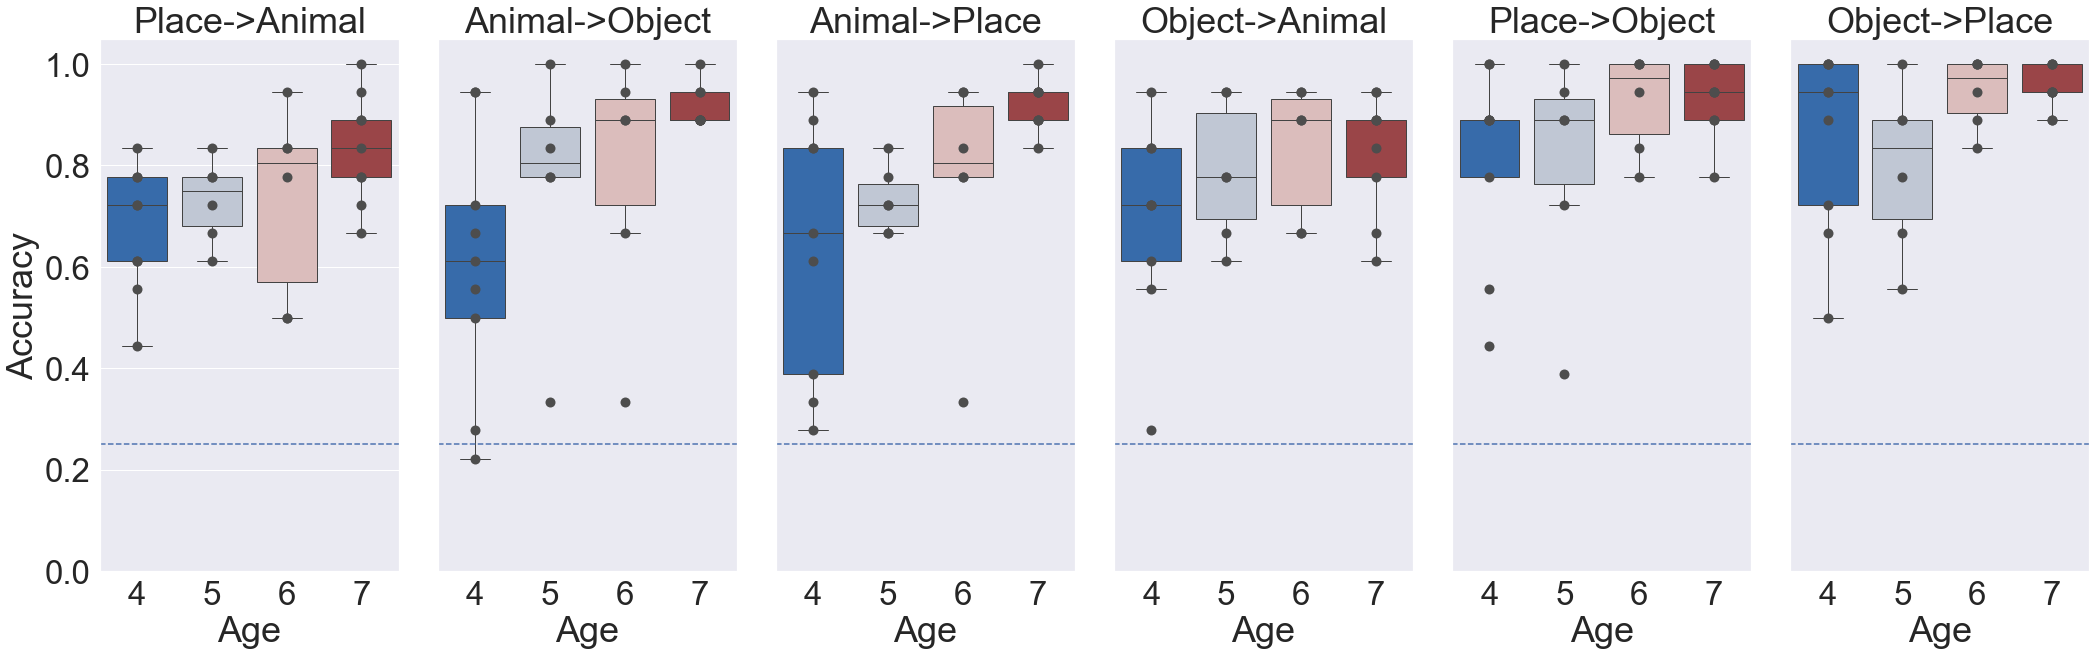

               Anova
     F Value Num DF  Den DF  Pr > F
-----------------------------------
Pair  9.8761 5.0000 145.0000 0.0000



In [43]:
from statsmodels.stats.anova import AnovaRM
PCcols = ['Ab', 'Bc', 'Ba', 'Cb', 'Ac', 'Ca']
ABC = {'A':'Place','B':'Animal','C':'Object'}
ordertmp = [4,5,6,7]
sns.set(font_scale=3)
for delay in [True,False]:
    print('For subjects with delay = '+str(delay))
    tmp = pairaccuracydf[pairaccuracydf['Delay'] == delay].copy()
    tmp['Age'] = tmp['Age'].map(lambda age: math.floor(age))
    fig = plt.figure(figsize=(30,10))
    for i,pair in enumerate(PCcols):
        pairstring = ABC[pair[0]]+'->'+ABC[pair[1].upper()]
        ax = plt.subplot(1,6, i+1)
        tempdf = tmp.loc[tmp['Pair'] == pairstring]
        sns.boxplot(data=tempdf, x="Age", y="Accuracy", hue='Age',
                    palette="vlag",order=ordertmp,hue_order=ordertmp,
                    showfliers = False,legend=False)
        sns.stripplot(data=tempdf, x="Age", y="Accuracy", dodge=True,
                      color=".3",order=ordertmp,s=10,jitter=False)
        plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.4)
        plt.title(pairstring)
        plt.axhline(y=0.25, color='b', linestyle='--')
        ax.set(ylim=(0,1.05))
        if i>0:
            ax.yaxis.set_visible(False)
    fig.tight_layout()
    plt.show()
    print(AnovaRM(data=tmp, depvar='Accuracy',
              subject='Subject', within=['Pair']).fit())

## Does Cue-type impact accuracy?

In [44]:

for delay in [True,False]:
    print('For subjects with delay = '+str(delay))
    tmp = pairaccuracydf[pairaccuracydf['Delay'] == delay].copy()
    res = pg.rm_anova(dv='Accuracy',within='Cue',subject='Subject',
                      data=tmp)
    post_hocs = pg.pairwise_tests(dv='Accuracy',within='Cue',
                                  subject='Subject',padjust='bonf',
                                  data=tmp)
    display(res)
    display(post_hocs)

For subjects with delay = True


,Source,ddof1,ddof2,F,p-unc,ng2,eps
0,Cue,2,74,8.543257,0.000459,0.031833,0.995315


,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,Cue,Animal,Object,True,True,-3.345628,37.0,two-sided,0.001893,0.005678,bonf,17.623,-0.340410
1,Cue,Animal,Place,True,True,0.242707,37.0,two-sided,0.809573,1.000000,bonf,0.18,0.025945
2,Cue,Object,Place,True,True,3.791577,37.0,two-sided,0.000536,0.001607,bonf,54.107,0.404931


For subjects with delay = False


,Source,ddof1,ddof2,F,p-unc,p-GG-corr,ng2,eps,sphericity,W-spher,p-spher
0,Cue,2,58,5.215046,0.008265,0.014629,0.029887,0.777468,False,0.713773,0.008909


,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,Cue,Animal,Object,True,True,-3.026201,29.0,two-sided,0.005151,0.015452,bonf,7.933,-0.384630
1,Cue,Animal,Place,True,True,-1.626811,29.0,two-sided,0.114596,0.343788,bonf,0.631,-0.227604
2,Cue,Object,Place,True,True,1.852221,29.0,two-sided,0.074199,0.222596,bonf,0.878,0.206446


## Does item-to-be retrieved impact accuracy?

In [36]:
for delay in [True,False]:
    print('For subjects with delay = '+str(delay))
    tmp = pairaccuracydf[pairaccuracydf['Delay'] == delay].copy()
    res = pg.rm_anova(dv='Accuracy',within='To-be-retrieved',subject='Subject',
                      data=tmp)
    post_hocs = pg.pairwise_tests(dv='Accuracy',within='To-be-retrieved',
                                  subject='Subject',padjust='bonf',
                                  data=tmp)
    display(res)
    display(post_hocs)

For subjects with delay = True


,Source,ddof1,ddof2,F,p-unc,ng2,eps
0,To-be-retrieved,2,70,9.240251,0.000275,0.042568,0.933941


,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,To-be-retrieved,Animal,Object,True,True,-1.724461,35.0,two-sided,0.093447,0.280342,bonf,0.683,-0.229571
1,To-be-retrieved,Animal,Place,True,True,-4.038036,35.0,two-sided,0.000280,0.000839,bonf,98.424,-0.508980
2,To-be-retrieved,Object,Place,True,True,-2.851973,35.0,two-sided,0.007243,0.021730,bonf,5.575,-0.267821


For subjects with delay = False


,Source,ddof1,ddof2,F,p-unc,ng2,eps
0,To-be-retrieved,2,82,8.384431,0.000486,0.017242,0.991552


,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,To-be-retrieved,Animal,Object,True,True,-3.019375,41.0,two-sided,0.004344,0.013033,bonf,8.233,-0.238726
1,To-be-retrieved,Animal,Place,True,True,-3.777872,41.0,two-sided,0.000504,0.001511,bonf,55.584,-0.309222
2,To-be-retrieved,Object,Place,True,True,-0.843924,41.0,two-sided,0.403609,1.000000,bonf,0.233,-0.060740
